In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns  # Import seaborn

In [2]:
 df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
if df['N'].all()>90:
    print(df['N'])

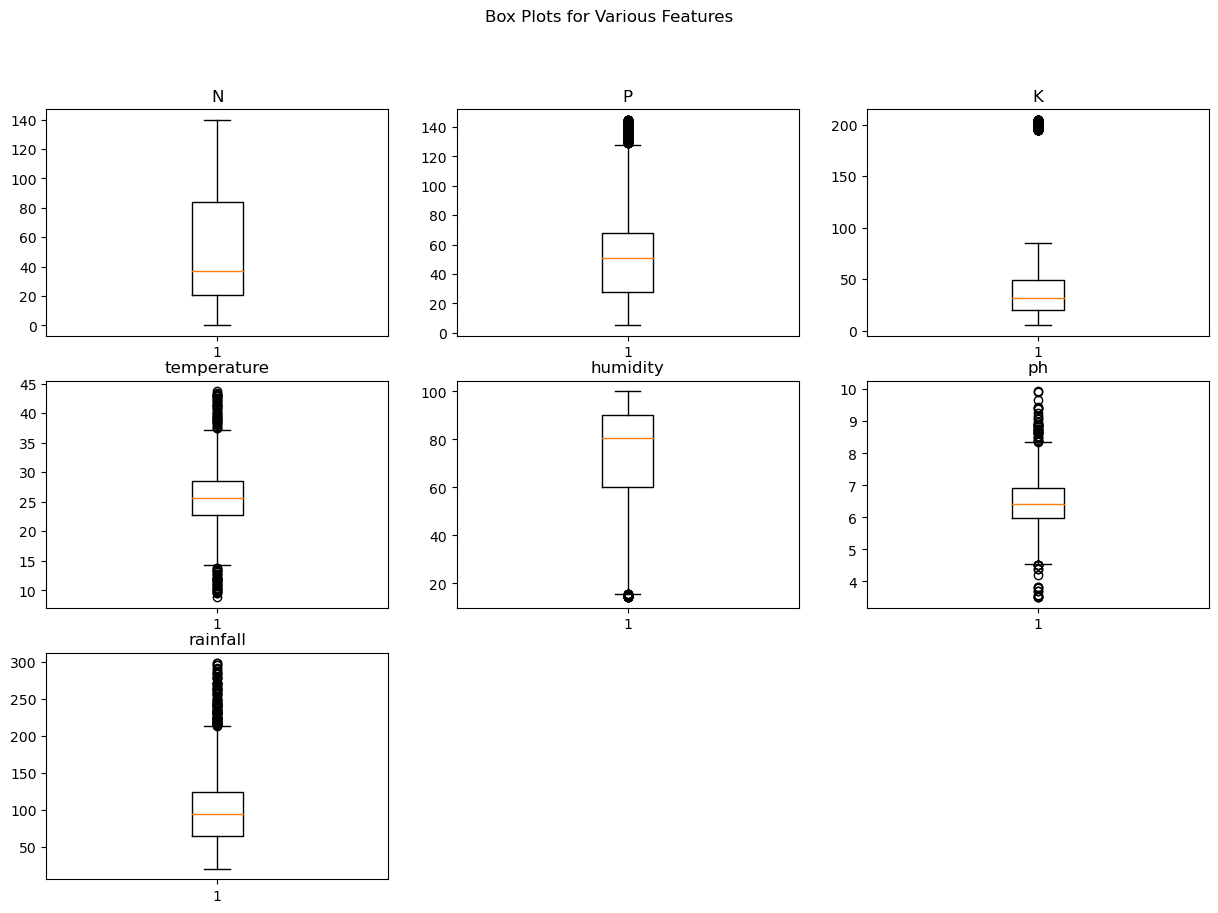

In [5]:
#Box Plot for Outliers Visualization
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Adjust the grid dimensions as needed
    plt.boxplot(df[feature])
    plt.title(feature)

plt.suptitle('Box Plots for Various Features')
plt.show()

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
x = df.drop('label', axis = 1)
y = df['label']

In [8]:
# Data Normalization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1,test_size = 0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9704545454545455


C:\Users\rosha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.9772727272727273


In [12]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
naive_bayes_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of naive_bayes is " + str(naive_bayes_acc))

Accuracy of naive_bayes is 0.9954545454545455


In [13]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators = 25, random_state=2)
model_4.fit(x_train.values, y_train.values)
y_pred_4 = model_4.predict(x_test)
random_fore_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy of Random Forest is " + str(random_fore_acc))

Accuracy of Random Forest is 0.9977272727272727


C:\Users\rosha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


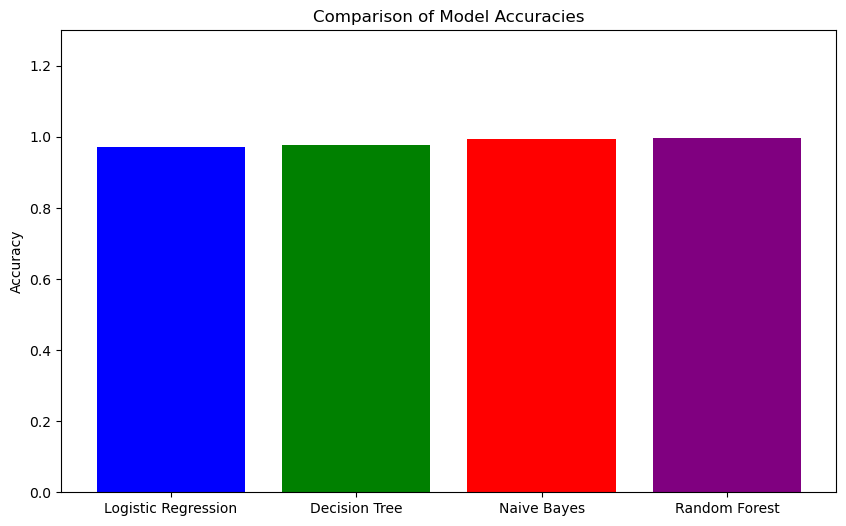

In [14]:
import matplotlib.pyplot as plt

# Sample accuracy values for each model (replace these with your actual accuracy values)
logistic_acc = logistic_acc  # Replace with your logistic regression accuracy
decision_acc = decision_acc  # Replace with your decision tree accuracy
naive_bayes_acc = naive_bayes_acc  # Replace with your naive bayes accuracy
random_fore_acc = random_fore_acc  # Replace with your random forest accuracy

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Corresponding accuracies
accuracies = [logistic_acc, decision_acc, naive_bayes_acc, random_fore_acc]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1.3)  # Set y-axis limit to be between 0 and 1 for accuracy

# Show the plot
plt.show()


In [15]:
import joblib 

In [16]:
file_name = 'crop_appp'

In [17]:
joblib.dump(model_4,'crop_appp')

['crop_appp']

In [18]:
app = joblib.load('crop_appp')

In [19]:
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)

In [20]:
acc

array(['rice'], dtype=object)

In [21]:
import pickle

In [22]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_4, file)

In [23]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

RandomForestClassifier(n_estimators=25, random_state=2)

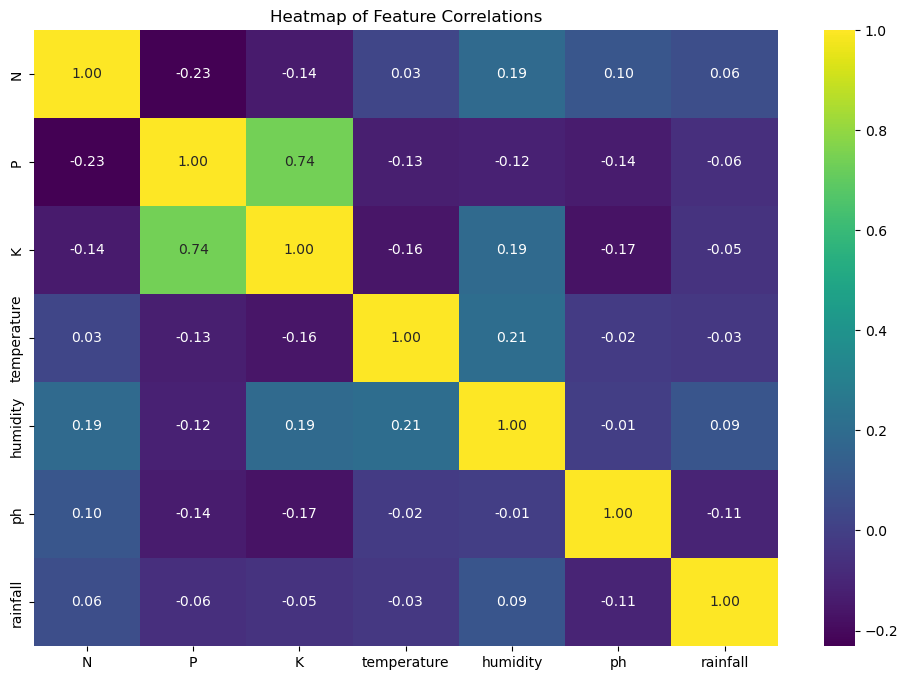

In [24]:
# Implementing a Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Feature Correlations')
plt.show()